# Salary Predictions Modelling 🔍

- __Author__ : "Shreya Shrestha"
- [__Email__](shreyashrestha995@gmail.com)
- [__LinkedIn__](https://www.linkedin.com/in/iamshreyashrestha/)

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error 
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")


### Pre-Processing

In [177]:
# 1. Load the data 
#training Dataframes
train_features = pd.read_csv('train_features.csv')
train_salaries = pd.read_csv('train_salaries.csv')
#testing Dataframe
test_df = pd.read_csv('test_features.csv')

# 2. Mergeing the train_feature to train_salaries
train_df = train_features.merge(train_salaries, on='jobId', how = 'left') 

# 3. Removing the outliers
train_df = train_df[train_df.salary > 8.5]

# 4. Removing the unique identifier
train_df = train_df.drop(columns = ['jobId'])
test_df = test_df.drop(columns = ['jobId'])

# 5. To define the variables
numerical = ['yearsExperience', 'milesFromMetropolis']
categorical = ['companyId', 'jobType', 'degree', 'major', 'industry']
target = ['salary']

#### To shuffle the data 

` By shuffling the data we ensure that each data point creates an "independent" change on the model, without being biased by the same points before them. `

In [4]:
train_df = shuffle(train_df).reset_index()

### 6. Feature Engineering

#### Encode the categorical variables using one-hot encode feature

In [5]:
cat_df = pd.get_dummies(train_df[categorical],dtype=int)
num_df = train_df[numerical].apply(pd.to_numeric)
train_df = pd.concat([cat_df, num_df], axis=1)

In [178]:
cat_df = pd.get_dummies(test_df[categorical],dtype=int)
num_df = test_df[numerical].apply(pd.to_numeric)
test_df = pd.concat([cat_df, num_df], axis=1)

In [6]:
train_df.head()

,companyId_COMP0,companyId_COMP1,companyId_COMP10,companyId_COMP11,companyId_COMP12,companyId_COMP13,companyId_COMP14,companyId_COMP15,companyId_COMP16,companyId_COMP17,...,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience,milesFromMetropolis,salary
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,20,2,162
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,8,98,132
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,19,13,147
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,23,9,121
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,65,57


#### Normalizing the numerical features

In [7]:
scaler = MinMaxScaler()

train_df[['yearsExperience','milesFromMetropolis']] = scaler.fit_transform(train_df[['yearsExperience','milesFromMetropolis']])
test_df[['yearsExperience','milesFromMetropolis']] = scaler.fit_transform(test_df[['yearsExperience','milesFromMetropolis']])

#### Splitting the dataset

In [8]:
X = train_df.drop('salary', axis=1)
y = train_df['salary']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=0)
print("The number of samples in training are:" , X_train.shape)
print("The number of samples in testing are:" , X_test.shape)
print("The number of samples in training are:" , y_train.shape)
print("The number of samples in testing are:" , y_test.shape)

The number of samples in training are: (699996, 94)
The number of samples in testing are: (299999, 94)
The number of samples in training are: (699996,)
The number of samples in testing are: (299999,)


### 7. Create Models

- **Linear Regression**
- **Random Forest Regressor**
- **Gradient-boost**

In [10]:
def get_report(model, X_train, y_train):
    cv = StratifiedKFold(n_splits=10, random_state=43, shuffle=True)

    # To find the cross valiadation scores using negative mean squared error
    cvResult = cross_val_score(model, X_train, y_train, cv = cv, scoring = 'neg_mean_squared_error')
    mean_mse = -1 * np.mean(cvResult)
    std_mse = np.std(cvResult)
    
    print('Average CV MSE: ', round(mean_mse, 2))
    print('Standard deviation during CV MSE: ', round(std_mse, 2)) 
    
    # Returning the accuracy 
    return mean_mse
    return std_mse

In [38]:
def create_plot(model_names, HT_mse, title, color = 'lightcoral'):
    plt.figure(figsize  = (7, 6))
    
    # creating a bar plot 
    if color != None:
        plt.bar(model_names, HT_mse, color = color)
    else:
        plt.bar(model_names, HT_mse)
    
    # adding the labels to the bars
    addlabels(model_names, HT_mse)
    
    # setting the title
    plt.title(
        title,
        fontsize = 15, # title size
        fontweight = 'bold', # making the title bold
         y = 1.02 # moving the title up alittle
    )
    
    # removing the xlabel and y_label 
    plt.xlabel(' ')
    plt.ylabel(' ')
    
    # removing the yticks 
    plt.yticks([])
    
    # rotating the titles of the bars since they are too big to fit otherwise
    plt.xticks(
        rotation = 45, 
        horizontalalignment = 'right',
        fontsize = 10
    )
    
    plt.show()

In [43]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        # adding the text
        plt.text(i, y[i]//2, y[i], ha = 'center', Bbox = dict(facecolor = 'white', alpha = .5))

In [11]:
# The models we want to test
models = [
    LinearRegression(),
    GradientBoostingRegressor(),
    RandomForestRegressor()
]

In [12]:
# this list will contain all of the models accuracies
MSE = []

for model in models:
    # printing out the model name
    print(str(model).upper())
    MSE.append(get_report(model, X_train, y_train))
    
    # creating space 
    
    print()
    print()

LINEARREGRESSION()
Average CV MSE:  384.56
Standard deviation during CV MSE:  1.49


GRADIENTBOOSTINGREGRESSOR()
Average CV MSE:  375.81
Standard deviation during CV MSE:  1.51


RANDOMFORESTREGRESSOR()
Average CV MSE:  401.63
Standard deviation during CV MSE:  1.73




In [13]:
for model in models:
    # printing out the model name
    print(str(model).upper())   
    pprint(model.get_params())
    print()


LINEARREGRESSION()
{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

GRADIENTBOOSTINGREGRESSOR()
{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

RANDOMFORESTREGRESSOR()
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': No

### Hyperparameter tuning 

In [16]:
# hyperparameter tuning done manually for each model
# The models we want to test
hyperTuned_models = [
    LinearRegression(),
    GradientBoostingRegressor(n_estimators = 150, max_depth = 7,random_state = 0, loss = 'ls', verbose = 0),
    RandomForestRegressor(n_estimators = 150, n_jobs = 2, max_depth = 25, min_samples_split = 60, \
                           max_features = 30, verbose = 0)
]

In [17]:
# this list will contain all of the models accuracies
HT_mse = []

for model in hyperTuned_models:
    # printing out the model name
    print(str(model).upper())
    HT_mse.append(get_report(model, X_train, y_train))

    # creating space 
    
    print()
    print()

LINEARREGRESSION()
Average CV MSE:  384.56
Standard deviation during CV MSE:  1.49


GRADIENTBOOSTINGREGRESSOR(MAX_DEPTH=7, N_ESTIMATORS=150, RANDOM_STATE=0)
Average CV MSE:  357.5
Standard deviation during CV MSE:  1.17


RANDOMFORESTREGRESSOR(MAX_DEPTH=25, MAX_FEATURES=30, MIN_SAMPLES_SPLIT=60,
                      N_ESTIMATORS=150, N_JOBS=2)
Average CV MSE:  366.76
Standard deviation during CV MSE:  1.26




#### Construting a datafrom out of the CV results

In [84]:
CVresults_df = pd.DataFrame([HT_mse]).T
CVresults_df.columns = ['Mean_MSE']
CVresults_df.index = ['Linear Regression','Gradient Boosting','Random Forest']

In [85]:
# To round the Mean_MSE to 2 decimal places
CVresults_df.Mean_MSE = round(CVresults_df['Mean_MSE'],2)

In [86]:
CVresults_df

,Mean_MSE
Linear Regression,384.56
Gradient Boosting,357.50
Random Forest,366.76


In [89]:
sorted_mean_mse = CVresults_df.sort_values('Mean_MSE')


In [100]:
modelname = sorted_mean_mse.index.tolist()


In [101]:
modelname


['Gradient Boosting', 'Random Forest', 'Linear Regression']

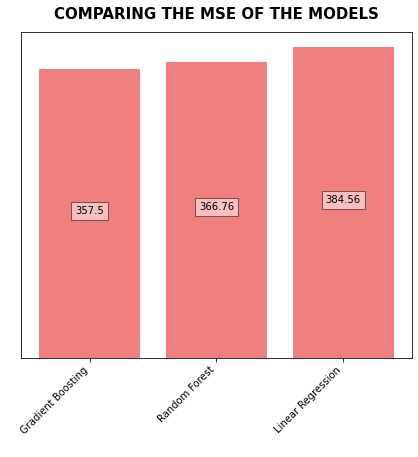

In [102]:
# title of the plot
title = 'COMPARING THE MSE OF THE MODELS'

# creating the plot
create_plot(sorted_mean_mse.index.tolist(),sorted_mean_mse['Mean_MSE'], title)


#### Now that the performance of the models has been evaluated, we will train the entire dataset using the best performing model - GradientBoastingRegressor with the lowest MSE.

In [131]:
model = GradientBoostingRegressor(n_estimators = 150, max_depth = 7,random_state = 0, loss = 'ls', verbose = 0)
print(model)

# To train the model:
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=7, n_estimators=150, random_state=0)


GradientBoostingRegressor(max_depth=7, n_estimators=150, random_state=0)

#### Saving the model

In [137]:
from pickle import dump
from pickle import load

filename = 'final_model.sav'
dump(model, open(filename, 'wb'))


#### To make predictions on the train data

In [138]:
prediction = model.predict(X_train)


#### To visualize the Gradient Boosting Model evaluation on test dataset

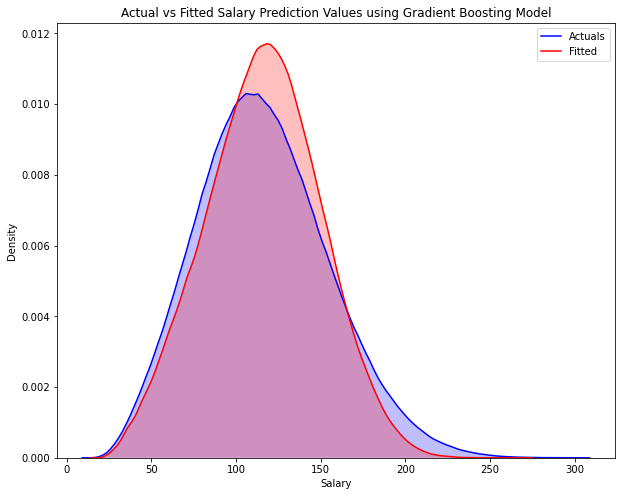

In [199]:
fig = plt.figure(figsize = (10,8))
ax1 = sns.distplot(train_df['salary'], color='b', label="Actuals", kde_kws={"shade": True}, hist=False)
ax1 = sns.distplot(prediction, color='r', label="Fitted", kde_kws={"shade": True}, hist=False)
plt.legend()
plt.title("Actual vs Fitted Salary Prediction Values using Gradient Boosting Model")
plt.xlabel("Salary")
plt.ylabel("Density")
plt.savefig('GradientBoot_Training_AVsF.png')
plt.show()

#### Feature Importance

In [159]:
importance = model.feature_importances_


In [160]:
feature_importance = pd.DataFrame({'Feature':X_train.columns, "Importance" : importance})


In [161]:
#Sorting values by ascending values
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance.set_index('Feature', inplace=True, drop=True)


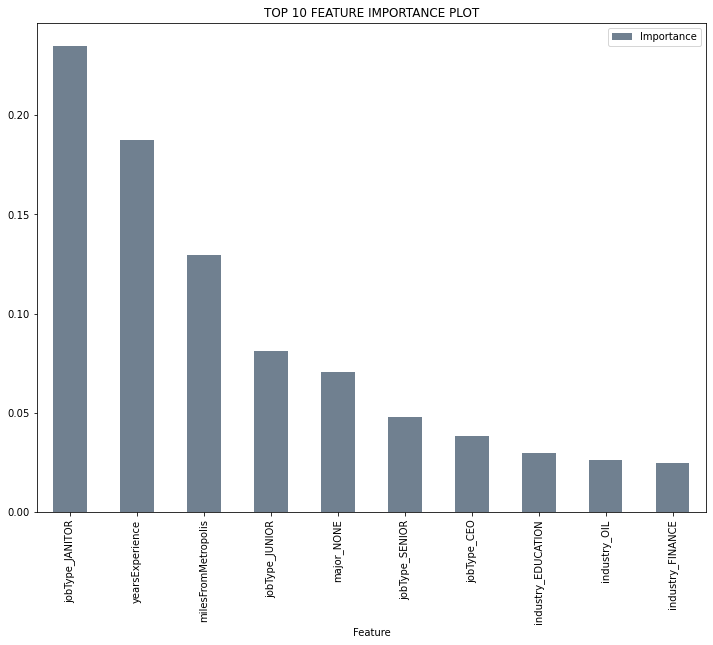

In [205]:
fig = feature_importance.head(10).plot.bar(figsize=(12,9),color = 'slategrey')
fig.set_title('TOP 10 FEATURE IMPORTANCE PLOT')
plt.savefig('Feature_importance.png')
plt.show()


In [164]:
feature_importance[0:10]


,Importance
Feature,
jobType_JANITOR,0.234752
yearsExperience,0.187388
milesFromMetropolis,0.129661
jobType_JUNIOR,0.081191
major_NONE,0.070763
jobType_SENIOR,0.048110
jobType_CEO,0.038499
industry_EDUCATION,0.029835
industry_OIL,0.026080


### 7. Model Deployment

In [192]:
#Make predictions on new data i.e the test dataset, and save results
test_predictions = model.predict(test_df)
np.savetxt('predictions.csv', test_predictions, delimiter=',')


In [193]:
test_predictions = pd.Series(test_predictions)


In [194]:
test_predictions.head(20)


0      97.561363
1      68.323079
2     140.297405
3     111.268501
4     119.139709
5     152.927481
6      97.110202
7     128.990071
8     118.287002
9      96.850909
10     58.865912
11     88.858357
12     86.825822
13     41.751204
14     97.485120
15     96.592097
16     95.465913
17     66.538129
18    112.571335
19     76.433812
dtype: float64

#### To save the predicted model with Pickle

In [195]:
predicted_model = load(open(filename, 'rb'))
result = predicted_model.predict(test_df)
result[:20]

array([ 97.56136329,  68.32307883, 140.29740512, 111.26850114,
       119.13970939, 152.92748074,  97.11020231, 128.99007071,
       118.28700152,  96.850909  ,  58.86591202,  88.85835728,
        86.82582168,  41.75120364,  97.48512006,  96.59209655,
        95.46591331,  66.53812856, 112.57133479,  76.43381249])